In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Desktop/retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
df.info()
df.isnull().sum()
df.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df['Weekday']=df['Date'].dt.day_name()
df['TotalPrice']=df['Quantity']*df['Price per Unit']

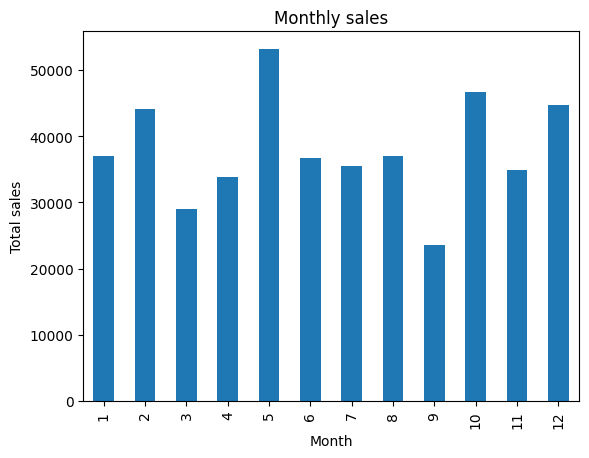

In [7]:
#Sales trend by Month
monthly_sales=df.groupby('Month')['TotalPrice'].sum()
monthly_sales.plot(kind='bar',title='Monthly sales')
plt.ylabel("Total sales")
plt.show()

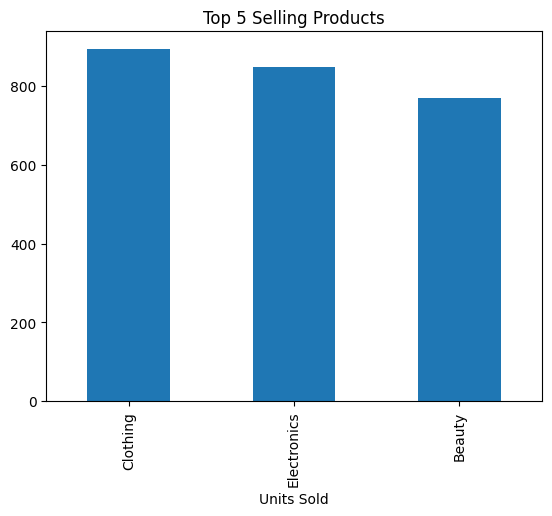

In [10]:
#Selling Product
top_products=df.groupby('Product Category')['Quantity'].sum().nlargest(5)
top_products.plot(kind='bar',title='Top 5 Selling Products')
plt.xlabel("Units Sold")
plt.show()

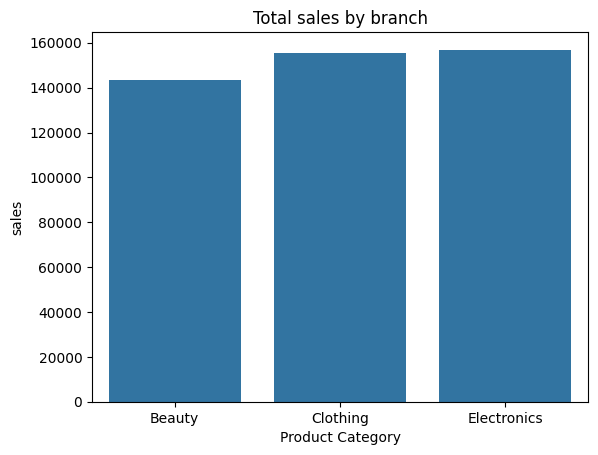

In [12]:
#Sales by Branch
branch_sales=df.groupby('Product Category')['TotalPrice'].sum()
sns.barplot(x=branch_sales.index, y=branch_sales.values)
plt.title("Total sales by branch")
plt.ylabel("sales")
plt.show()

Text(0.5, 1.0, 'Sales by Gender')

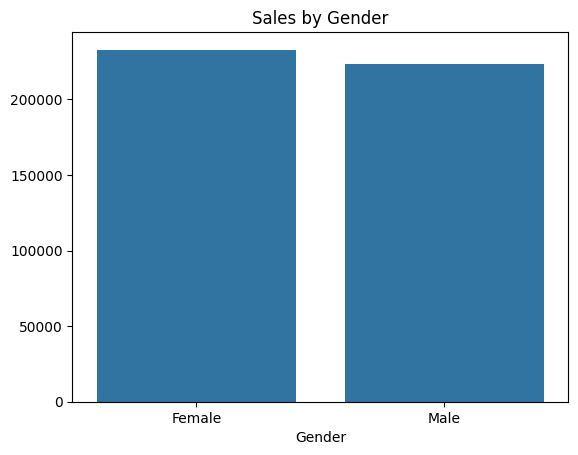

In [13]:
#Gender based spending
gender_sales=df.groupby('Gender')['TotalPrice'].sum()
sns.barplot(x=gender_sales.index, y=gender_sales.values)
plt.title('Sales by Gender')

In [25]:
sales_by_date=df.groupby('Date')['TotalPrice'].sum().reset_index()
sales_by_date.set_index('Date', inplace=True)
sales_by_date=sales_by_date.asfreq('D')
sales_by_date=sales_by_date.asfreq('D').fillna(0)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(sales_by_date['TotalPrice'],order=(1,1,1))
model_fit=model.fit()
forecast=model_fit.forecast(steps=7)
print(forecast)